In [12]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal
from mnist_models import *
import os

%matplotlib nbagg

tf.logging.set_verbosity(tf.logging.ERROR)

#### SET THIS BEFORE RUNNING
NAME = "seven_for_all_mankind"

model = MnistConvolutionalModel()
try:
    checkpoints = sorted(["{}/{}".format(ROOT.format(NAME),x[:-5]) for x in os.listdir(ROOT.format(NAME)) if x.endswith(".meta")], 
                     key=lambda x: int(x.split("-")[-1]))
except FileNotFoundError:
    checkpoints = []
model.saver.recover_last_checkpoints(checkpoints)
try: latest_checkpoint = model.saver.last_checkpoints[-1]
except: pass

## Confusion Matrix Time Series

In [ ]:
#### Rows are true label, columns are the prediction
def p_test_confusion_matrix(model):
    cf = np.zeros((10,10))
    probs = tf.nn.softmax(model.logits)
    answers = probs.eval(feed_dict={model.x: mnist.test.images, model.y_: mnist.test.labels, model.keep_prob: 1.0})
    for i in range(len(mnist.test.labels)):
        index = np.argmax(mnist.test.labels[i])
        cf[index] += answers[i]
    return cf
def p_train_confusion_matrix(model):
    cf = np.zeros((10,10))
    probs = tf.nn.softmax(model.logits)
    BATCH_SIZE = 1000
    j = 0
    for i in range(int(len(mnist.train.images)/BATCH_SIZE)):
        answers = probs.eval(feed_dict={
            model.x: mnist.train.images[i*BATCH_SIZE:(i+1)*BATCH_SIZE],
            model.y_: mnist.train.labels[i*BATCH_SIZE:(i+1)*BATCH_SIZE],
            model.keep_prob: 1
        })
        k = 0
        while (j < len(mnist.train.images)) and (k < len(answers)):  
            index = np.argmax(mnist.train.labels[j])
            cf[index] += answers[k]
            j+=1
            k+=1
    return cf

### Create the Confusion Matrix Time Series

### Load the Confusion Matrix Time Series

### Graph it all

In [26]:
x = range(len(ptcfs))
Ytests = np.array([ptcfs[i].as_matrix()for i in range(len(ptcfs))])
Ytrains = np.array([ptrcfs[i].as_matrix()for i in range(len(ptrcfs))])

<IPython.core.display.Javascript object>


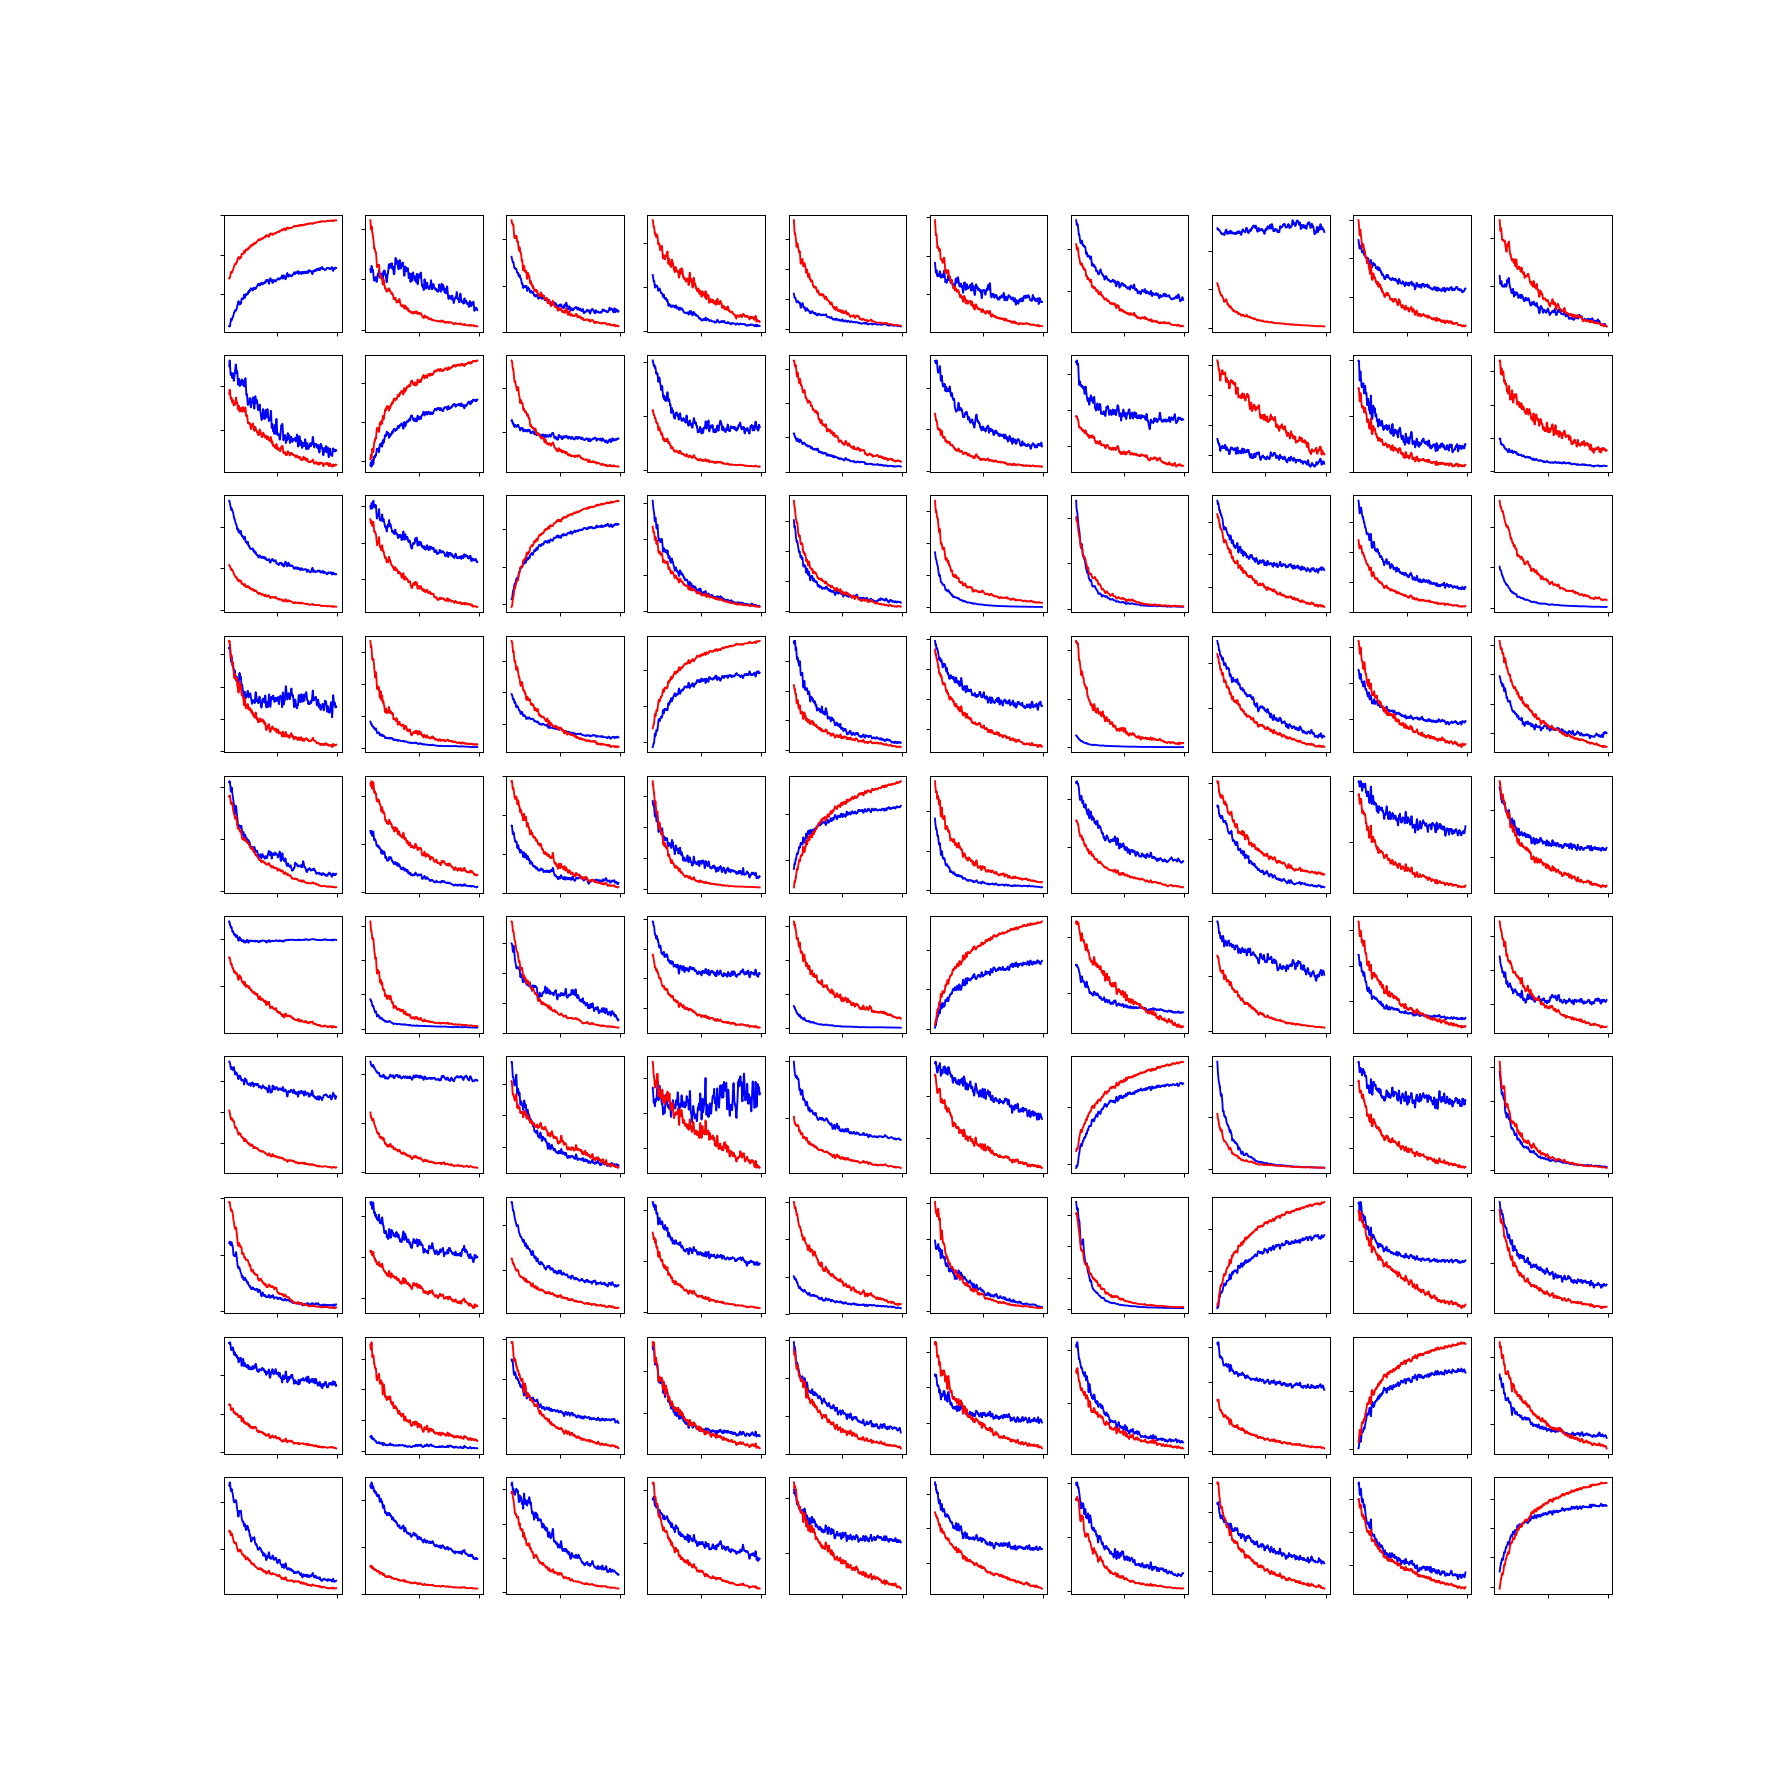

In [33]:
filt = scipy.signal.gaussian(10,3)
filt /= sum(filt)
fig, axarr = plt.subplots(10,10)
for r in range(10):
    for c in range(10):
        axarr[r,c].set_xticklabels([])
        axarr[r,c].set_yticklabels([])
        axarr[r,c].plot(x[100:990], scipy.signal.convolve(Ytests[:,r,c], filt,mode='same')[100:990],'b')
        axarr[r,c].plot(x[100:990], scipy.signal.convolve(Ytrains[:,r,c], filt,mode='same')[100:990],'r')
fig.set_size_inches(20, 20)
#plt.show()
fig.savefig('confusion_matrix_by_time.png')